<a href="https://colab.research.google.com/github/Cal-Poly-Data-301/lab-4-davidayu/blob/main/DATA_301_Lab_4_David_Yu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Beer

Your goal is to train a model to predict the bitterness of a beer (in International Bittering Units, or IBU), given features about the beer. You can acquire the data in two places:

- on [Kaggle](https://www.kaggle.com/c/beer2020/data) 
- on [Github](https://github.com/dlsun/pods/tree/master/data/beer) (https://dlsun.github.io/pods/data/beer/beer_train.csv and https://dlsun.github.io/pods/data/beer/beer_test.csv )

A description of the variables is available [here](https://www.kaggle.com/c/beer2020/data).


We would like to predict **ibu** using a $20$-nearest neighbors model.

There are three features that have to do with the physical properties of the beer:  **abv**, **srm**, **original gravity**

There are two "cultural" features that have to do with how/when the beer is traditionally served: **glass**, **available**

Consider predicting **ibu** from 
(a) Only the physical features
(b) Only the cultural features
(c) All five features

In [ ]:
import pandas as pd
import numpy as np

data_dir = "https://dlsun.github.io/pods/data/"

df_beer = pd.read_csv(data_dir + "beer/beer_train.csv", index_col="id")
df_beer["srm"] = df_beer["srm"].replace("Over 40", "50")
df_beer[["abv", "ibu", "originalGravity", "srm"]] = df_beer[["abv", "ibu", "originalGravity", "srm"]].astype(float)

df_beer



,abv,available,description,glass,ibu,isOrganic,name,originalGravity,srm
id,,,,,,,,,
0,8.2,"Available at the same time of year, every year.",A Belgian-Abbey-Style Tripel that is big in al...,NaN,31.0,N,LoonyToonTripel,1.070,8.0
1,5.7,"Available at the same time of year, every year.",Covert Hops is a crafty ale. Its stealthy dark...,Pint,45.0,N,Covert Hops,1.056,35.0
2,5.8,"Available at the same time of year, every year.",This is a traditional German-style Marzen char...,Mug,25.0,N,Oktoberfest,1.048,10.0
3,5.5,Available year round as a staple beer.,A West Coast-Style Pale Ale balancing plenty o...,Pint,55.0,N,Pale Ale,1.044,5.0
4,4.8,Available year round as a staple beer.,This Bombshell has a tantalizing crisp and cle...,Pint,11.4,N,Head Turner Blonde Ale,1.045,3.0
...,...,...,...,...,...,...,...,...,...
5995,5.5,Available year round as a staple beer.,"Taking its cues from “Three Threads”, a barten...",Pint,33.0,N,Mayflower Porter,1.040,50.0
5996,11.0,"Available at the same time of year, every year.",Our barley wine is what would be considered an...,NaN,30.0,N,Barbieswine,1.085,20.0
5997,5.2,Available year round as a staple beer.,Our version of a west coast pale ale pushes th...,Pint,45.0,N,Canuck Pale Ale,1.044,8.0


## Question 1
Let's see how the distance metric, the scaling method, and the model influence prediction accuracy. 

Consider only the *physical* features. Train a **20**-nearest-neighbor model to predict **ibu**. Try fitting models with different distance metrics and scaling methods. 

Which distance metric and/or scaling method gives the best prediction accuracy? Why do you think that might be?

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

beer_train = df_beer.loc[:4001].copy()
beer_test = df_beer.loc[4001:].copy()

X_train = beer_train[["abv", "srm", "originalGravity"]]
y_train = beer_train["ibu"]
X_test = beer_test[["abv", "srm", "originalGravity"]]

In [ ]:
from sklearn.pipeline import make_pipeline


pipeline = make_pipeline(
          StandardScaler(),
          KNeighborsRegressor(n_neighbors=20)
)

pipeline.fit(X=X_train, y=y_train)
predicted_values = pipeline.predict(X_test)
predicted_values

array([32.45, 45.85, 69.85, ..., 33.22, 29.09, 25.84])

In [ ]:
from sklearn.metrics import mean_absolute_error

actual_values = np.array(beer_test["ibu"])

mean_absolute_error(actual_values, predicted_values)

14.320362506253124

In [ ]:
metrics = ["euclidean", "manhattan", "chebyshev", "minkowski"]

mae_results = []
for metric in metrics:
    pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=20, metric=metric))
    pipeline.fit(X=X_train, y=y_train)
    predicted_values = pipeline.predict(X_test)
    mae = mean_absolute_error(actual_values, predicted_values)
    mae_results.append(mae)
    
best_metric_index = np.argmin(mae_results)
best_metric = metrics[best_metric_index]
best_mae = mae_results[best_metric_index]

print("Best metric:", best_metric)
print("Lowest MAE:", best_mae)


Best metric: manhattan
Lowest MAE: 14.088451900950474


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

metrics = ["euclidean", "manhattan", "chebyshev", "minkowski"]
scalers = [StandardScaler, MinMaxScaler, Normalizer]


for metric in metrics:
  for scaler in scalers:
    pipeline = make_pipeline(scaler(), KNeighborsRegressor(n_neighbors=20, metric=metric))
    pipeline.fit(X=X_train, y=y_train)
    predicted_values = pipeline.predict(X_test)
    mae = mean_absolute_error(actual_values, predicted_values)
    print(f"{metric}, {scaler}, {mae}")


euclidean, <class 'sklearn.preprocessing._data.StandardScaler'>, 14.320362506253124
euclidean, <class 'sklearn.preprocessing._data.MinMaxScaler'>, 15.253982216108053
euclidean, <class 'sklearn.preprocessing._data.Normalizer'>, 16.09846475737869
manhattan, <class 'sklearn.preprocessing._data.StandardScaler'>, 14.088451900950474
manhattan, <class 'sklearn.preprocessing._data.MinMaxScaler'>, 15.109741970985493
manhattan, <class 'sklearn.preprocessing._data.Normalizer'>, 16.27361695847924
chebyshev, <class 'sklearn.preprocessing._data.StandardScaler'>, 14.537417033516757
chebyshev, <class 'sklearn.preprocessing._data.MinMaxScaler'>, 15.45182451225613
chebyshev, <class 'sklearn.preprocessing._data.Normalizer'>, 16.055746248124063
minkowski, <class 'sklearn.preprocessing._data.StandardScaler'>, 14.320362506253124
minkowski, <class 'sklearn.preprocessing._data.MinMaxScaler'>, 15.253982216108053
minkowski, <class 'sklearn.preprocessing._data.Normalizer'>, 16.09846475737869


Manhattan distance with standard scaler gives the best mae. It's probably the best in this use case because the different dimensions ("abv", "srm", "originalGravity") are not comparable and manhattan works well with data like that. We also cleaned the data and changed over 40 to 50. For all of these we did a 90/10 train validation split. 

## Question 2

Repeat Question 1, this time using the *cultural* features.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
X_train = beer_train[["available", "glass"]]
y_train = beer_train["ibu"]
X_test = beer_test[["available", "glass"]]

encoder = OneHotEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

pipeline = make_pipeline(
          StandardScaler(with_mean=False),
          KNeighborsRegressor(n_neighbors=20)
)

pipeline.fit(X=X_train, y=y_train)
predicted_values = pipeline.predict(X_test)

predicted_values

array([50.505, 52.165, 50.58 , ..., 49.25 , 44.6  , 45.285])

In [ ]:
mean_absolute_error(actual_values, predicted_values)

21.76702991495748

In [ ]:
metrics = ["euclidean", "manhattan", "minkowski"]

mae_results = []
for metric in metrics:
    pipeline = make_pipeline(KNeighborsRegressor(n_neighbors=20, metric=metric))
    pipeline.fit(X=X_train, y=y_train)
    predicted_values = pipeline.predict(X_test)
    mae = mean_absolute_error(actual_values, predicted_values)
    mae_results.append(mae)
    print(f"{metric}, {mae}")
    
best_metric_index = np.argmin(mae_results)
best_metric = metrics[best_metric_index]
best_mae = mae_results[best_metric_index]

print("\nBest metric:", best_metric)
print("Lowest MAE:", best_mae)


euclidean, 20.765332166083045
manhattan, 20.765332166083045
minkowski, 20.765332166083045

Best metric: euclidean
Lowest MAE: 20.765332166083045


They're the same because in OneHotEncoding(), all values are 0's and 1's so all distance metrics result in the same value. So what distance metrics we choose don't really matter, as all of the things are 0s and 1s we did not scale them.

## Question 3

Finally, repeat Question 1, using *all* the features.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

ct = make_column_transformer(
    (StandardScaler(), ["abv", "srm", "originalGravity"]),
    (OneHotEncoder(), ["available", "glass"]),
    remainder="drop"  # all other columns in X will be dropped.
)
ct

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['abv', 'srm', 'originalGravity']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['available', 'glass'])])

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor

pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=20)
)

pipeline.fit(X=beer_train[["abv", "srm", "originalGravity", "available", "glass"]], 
             y=beer_train["ibu"])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['abv', 'srm',
                                                   'originalGravity']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['available', 'glass'])])),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=20))])

In [ ]:
X_test = beer_test[["abv", "srm", "originalGravity", "available", "glass"]]
X_train = beer_train[["abv", "srm", "originalGravity", "available", "glass"]]

predicted_values = pipeline.predict(X_test)

predicted_values

array([31.568, 30.04 , 63.6  , ..., 36.33 , 31.115, 30.275])

In [ ]:
mean_absolute_error(actual_values, predicted_values)

15.191689994997498

In [ ]:
metrics = ["euclidean", "manhattan", "minkowski"]
scalers = [StandardScaler, MinMaxScaler, Normalizer]

for metric in metrics:
  for scaler in scalers:
    ct = make_column_transformer(
      (scaler(), ["abv", "srm", "originalGravity"]),
      (OneHotEncoder(), ["available", "glass"]),
      remainder="drop"  # all other columns in X will be dropped.
    )
  

    pipeline = make_pipeline(ct, KNeighborsRegressor(n_neighbors=20, metric=metric))
    pipeline.fit(X=beer_train[["abv", "srm", "originalGravity", "available", "glass"]], 
             y=beer_train["ibu"])
    predicted_values = pipeline.predict(X_test)
    mae = mean_absolute_error(actual_values, predicted_values)

    print(f"{metric}, {scaler}, {mae}")
    

euclidean, <class 'sklearn.preprocessing._data.StandardScaler'>, 15.191689994997498
euclidean, <class 'sklearn.preprocessing._data.MinMaxScaler'>, 15.729157653826912
euclidean, <class 'sklearn.preprocessing._data.Normalizer'>, 17.577371160580288
manhattan, <class 'sklearn.preprocessing._data.StandardScaler'>, 14.98328424212106
manhattan, <class 'sklearn.preprocessing._data.MinMaxScaler'>, 15.629016658329165
manhattan, <class 'sklearn.preprocessing._data.Normalizer'>, 17.757412631315656
minkowski, <class 'sklearn.preprocessing._data.StandardScaler'>, 15.191689994997498
minkowski, <class 'sklearn.preprocessing._data.MinMaxScaler'>, 15.729157653826912
minkowski, <class 'sklearn.preprocessing._data.Normalizer'>, 17.577371160580288


Again, manhattan distance with StandardScaler for quantitative variables gives lowest mae.

## Question 4

Finally, let's determine the right value of $k$. Use the set of features, the distance metric, and the scaling method that you determined to be best (for $k=20$ nearest neighbors model) in Question 4. Fit $k$-nearest neighbor models for different values of $k$. Plot the training error and the estimated test error as functions of $k$, and determine the optimal value of $k$.

In [ ]:
num_neighbors = []
mae_test = []

ct = make_column_transformer(
      (StandardScaler(), ["abv", "srm", "originalGravity"]),
      (OneHotEncoder(), ["available", "glass"]),
      remainder="drop"  # all other columns in X will be dropped.
    )

for i in range(1, 30):
  pipeline = make_pipeline(ct, KNeighborsRegressor(n_neighbors=i, metric="manhattan"))
  pipeline.fit(X=beer_train[["abv", "srm", "originalGravity", "available", "glass"]], 
            y=beer_train["ibu"])
  predicted_values = pipeline.predict(X_test)
  mae = mean_absolute_error(actual_values, predicted_values)
  print(f"Number neighbors: {i}, mae test: {mae}\n")
  num_neighbors.append(i)
  mae_test.append(mae)


Number neighbors: 1, mae test: 17.82040220110055

Number neighbors: 2, mae test: 15.926256378189093

Number neighbors: 3, mae test: 15.26669084542271

Number neighbors: 4, mae test: 15.061406703351675

Number neighbors: 5, mae test: 14.787331165582792

Number neighbors: 6, mae test: 14.736210688677671

Number neighbors: 7, mae test: 14.839753876938468

Number neighbors: 8, mae test: 14.844372311155578

Number neighbors: 9, mae test: 14.823684175421045

Number neighbors: 10, mae test: 14.795217408704351

Number neighbors: 11, mae test: 14.846044658692982

Number neighbors: 12, mae test: 14.877418709354677

Number neighbors: 13, mae test: 14.946763766498634

Number neighbors: 14, mae test: 14.955958336311012

Number neighbors: 15, mae test: 14.93517992329498

Number neighbors: 16, mae test: 14.95932037893947

Number neighbors: 17, mae test: 14.965520760380189

Number neighbors: 18, mae test: 14.978214357178588

Number neighbors: 19, mae test: 14.988981148468971

Number neighbors: 20, mae

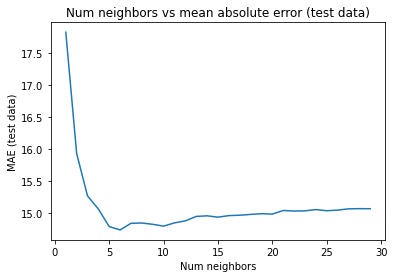

In [ ]:
import matplotlib.pyplot as plt

plt.plot(num_neighbors, mae_test)
plt.title('Num neighbors vs mean absolute error (test data)')
plt.xlabel('Num neighbors')
plt.ylabel('MAE (test data)')
plt.show()

Optimal value of k for test data is 6.

In [ ]:
num_neighbors = []
mae_train = []

ct = make_column_transformer(
      (StandardScaler(), ["abv", "srm", "originalGravity"]),
      (OneHotEncoder(), ["available", "glass"]),
      remainder="drop"  # all other columns in X will be dropped.
    )

for i in range(1, 30):
  pipeline = make_pipeline(ct, KNeighborsRegressor(n_neighbors=i, metric="manhattan"))
  pipeline.fit(X=beer_test[["abv", "srm", "originalGravity", "available", "glass"]], 
            y=beer_test["ibu"])
  predicted_values = pipeline.predict(X_test)
  mae = mean_absolute_error(actual_values, predicted_values)
  print(f"Number neighbors: {i}, mae test: {mae}\n")
  num_neighbors.append(i)
  mae_train.append(mae)


Number neighbors: 1, mae test: 0.38289144572286143

Number neighbors: 2, mae test: 9.673994497248623

Number neighbors: 3, mae test: 11.190258462564616

Number neighbors: 4, mae test: 12.01061780890445

Number neighbors: 5, mae test: 12.582528264132067

Number neighbors: 6, mae test: 12.918283308320825

Number neighbors: 7, mae test: 13.219186736225256

Number neighbors: 8, mae test: 13.46710167583792

Number neighbors: 9, mae test: 13.675105330443

Number neighbors: 10, mae test: 13.926659329664833

Number neighbors: 11, mae test: 14.110156441857292

Number neighbors: 12, mae test: 14.19374020343505

Number neighbors: 13, mae test: 14.334463385538923

Number neighbors: 14, mae test: 14.428431358536413

Number neighbors: 15, mae test: 14.481710188427549

Number neighbors: 16, mae test: 14.524924337168581

Number neighbors: 17, mae test: 14.57307359562134

Number neighbors: 18, mae test: 14.660350175087544

Number neighbors: 19, mae test: 14.70807403701851

Number neighbors: 20, mae tes

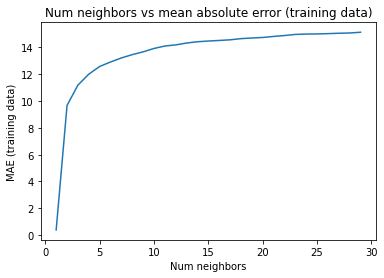

In [ ]:
plt.plot(num_neighbors, mae_train)
plt.title('Num neighbors vs mean absolute error (training data)')
plt.xlabel('Num neighbors')
plt.ylabel('MAE (training data)')
plt.show()

Optimal k value of training data is 1.

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 4 - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.